# Project

#### Applied Statistics Project Notebook

In [1]:
#Imports

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from scipy import stats
from scipy.stats import f_oneway

### 1. Download and save the dataset

In [2]:
# import and save as a CSV file
URL = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv'
FILENAME = 'data/plant_growth.csv'
# load into pandas dataframe
df = pd.read_csv(URL)

# export to data folder
df.to_csv(FILENAME, sep=',', index=False, encoding='utf-8')

### 2. Describe the data set

The PlantGrowth dataset in R is a simple and commonly used dataset for illustrating statistical analysis. It contains data from an experiment on the effect of different treatments on the growth of plants.

The dataset is a built-in dataset in R and contains results from an experiment designed to compare the yields (measured by the dried weight of plants) obtained under a control condition and two different treatment conditions[[1]](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/PlantGrowth)[[2]](https://github.com/KomlaAkpalu/PlantGrowth-DataAnalysis).

##### Format
The dataset is a data frame with 30 observations on 2 variables:
- `weight`: Numeric, representing the dried weight of the plants.
- `group`: Factor with three levels (`ctrl`, `trt1`, `trt2`), to show which treatment group each plant belongs to[[2]](https://github.com/KomlaAkpalu/PlantGrowth-DataAnalysis).

##### Usage
It is often used for practicing data analysis and visualization techniques in statistics, such as performing ANOVA (Analysis of Variance) to determine if there are significant differences between the groups and it is also used as basis for examining the impact of different treatments on plant growth[[1]](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/PlantGrowth).

In [3]:
# run describe on the data set
df.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


In [4]:
# split dataset according to groups

df_ctrl = df[df['group'] == 'ctrl']
df_trt1 = df[df['group'] == 'trt1']
df_trt2 = df[df['group'] == 'trt2']

In [5]:
# run describe on each new data set

df_ctrl.describe()

,rownames,weight
count,10.00000,10.000000
mean,5.50000,5.032000
std,3.02765,0.583091
min,1.00000,4.170000
25%,3.25000,4.550000
50%,5.50000,5.155000
75%,7.75000,5.292500
max,10.00000,6.110000


In [6]:
df_trt1.describe()

,rownames,weight
count,10.00000,10.000000
mean,15.50000,4.661000
std,3.02765,0.793676
min,11.00000,3.590000
25%,13.25000,4.207500
50%,15.50000,4.550000
75%,17.75000,4.870000
max,20.00000,6.030000


In [7]:
df_trt2.describe()

,rownames,weight
count,10.00000,10.000000
mean,25.50000,5.526000
std,3.02765,0.442573
min,21.00000,4.920000
25%,23.25000,5.267500
50%,25.50000,5.435000
75%,27.75000,5.735000
max,30.00000,6.310000


In [8]:
# convert to numpy arrays
ctrl = df_ctrl['weight'].to_numpy()
trt1 = df_trt1['weight'].to_numpy()
trt2 = df_trt2['weight'].to_numpy()

In [9]:
df_weights = pd.concat([df_ctrl['weight'], df_trt1['weight'], df_trt2['weight']], axis=1, keys=['ctrl', 'trt1', 'trt2'])

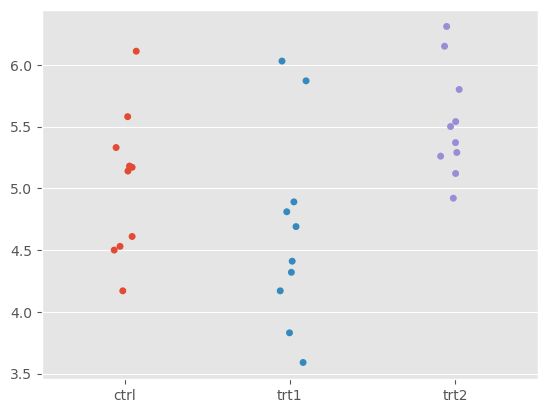

In [10]:
# Create a strip plot.
sns.stripplot(data=df_weights);

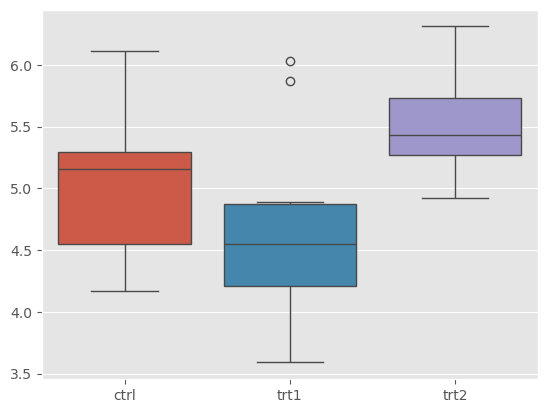

In [11]:
# Box plot.
sns.boxplot(data=df_weights);

### References
[1]"PlantGrowth: Results from an Experiment on Plant Growth" Rdocumentation. [Online]. Available: https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/PlantGrowth. [Accessed: 03-Dec-2024].

[2]"PlantGrowth Data Analysis with R" Komla Akpalu. [Online] Available: https://github.com/KomlaAkpalu/PlantGrowth-DataAnalysis [Accessed: 03-Dec-2024].

### 3. Describe what a t-test is, how it works, and what the assumptions are.

A t-test also known as Student's t test is a statistical test used to determine if there is a significant difference between the means of two groups[[3]](https://journals.lww.com/aoca/fulltext/2019/22040/application_of_student_s_t_test,_analysis_of.11.aspx). It helps evaluate whether observed differences in sample means are likely to have occurred by chance, or if they reflect real differences in the populations being compared. The test is particularly useful when the sample size is small, and the population standard deviation is unknown.

There are different types of t-tests depending on the situation:

1. One-sample t-test: Compares the mean of a single sample to a known value or theoretical population mean.
2. Independent two-sample t-test: Compares the means of two **independent groups** (e.g., treatment vs. control).
3. Paired t-test: Compares the means of two **related groups** (e.g., before and after a treatment on the same individuals)[[3]](https://journals.lww.com/aoca/fulltext/2019/22040/application_of_student_s_t_test,_analysis_of.11.aspx).

##### How it works

The formula for the independent two-sample t-test is:

$ t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $

Where:
- $\bar{X}_1$ and $\bar{X}_2$  are the sample means.
- $s_1^2$ and $s_2^2$ are the sample variances.
- $n_1$ and $n_2$ are the sample sizes.

##### Interpretation
- **t-value**: Indicates the ratio of the difference between the group means to the variability of the groups.
- **p-value**: Shows the probability that the observed difference occurred by chance. A p-value less than 0.05 typically indicates statistical significance.
- **Degrees of freedom (df)**: Related to the sample size and used to determine the critical value from the t-distribution.

##### Example
Suppose you want to test if a new drug affects blood pressure. You measure the blood pressure of 30 patients before and after administering the drug. You can use a paired sample t-test to compare the means of the two measurements.


##### Assumptions
For a t-test to be valid, the following assumptions should be met:
- The data should be approximately normally distributed.
- The variances of the two groups should be equal (homogeneity of variance).
- The data should be independent.

#### References
[1] "An Introduction to t Tests," Scribbr. [Online]. Available: https://www.scribbr.com/statistics/t-test/. [Accessed: 09-Dec-2024].

[2] "T Test (Student’s T-Test)," Statistics How To. [Online]. Available: https://www.statisticshowto.com/probability-and-statistics/t-test/. [Accessed: 09-Dec-2024].

[3] "T-Test," Investopedia. [Online]. Available: https://www.investopedia.com/terms/t/t-test.asp. [Accessed: 09-Dec-2024].

### 4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

[scipy.stats.
ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#ttest-ind)

As this T-test is being carried out on two different groups which received different treatments the indepentent T-test should be used[[1]](https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/)[[2]](https://www.pythonfordatascience.org/independent-samples-t-test-python/#:~:text=The%20test%20statistic%20is%20the,n%201%20%2B%201%20n%202).

**SciPy's `ttest_ind()`**:
   - Documentation: [SciPy t-test on two independent samples](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#ttest-ind)
   - This is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.


In [12]:
# Calculate the t-statistic using scipy.stats
t_statistic_scipy, p_value = stats.ttest_ind(trt2, trt1)

print(f"Calculated t-statistic: {t_statistic_scipy}, p-value: {p_value}")

Calculated t-statistic: 3.0100985421243616, p-value: 0.0075184261182198574


##### Critical value of t

A critical value of t is the threshold for significance in two-sample t tests[[5]](https://www.scribbr.com/statistics/students-t-table/#:~:text=A%20critical%20value%20of%20t,(two%2Dsample%20t%20tests))

it can be calculated using Student’s t table for one- and two-tailed tests.

![Students t table](https://www.scribbr.com/wp-content/uploads/2022/06/Critical-values-of-t-for-two-tailed-tests-s.webp) 

To calculate the critical t value we need the degrees of freedom($df$) and the significance level($α$).

for the Independent samples t test

$df = n1 + n2 – 2$

Where $n1$ is the sample size of group 1 and $n2$ is the sample size of group 2

By convention, $α$  is almost always .05[[5]](https://www.scribbr.com/statistics/students-t-table/).

For this test $df = 18$ and $α$ is $0.05$

Using the table we find the critical t value is 2.101 when $df = 18$ and $α = 0.05$

![Snippet of Student's t table with the column for df = 18](images/t_test_critical_value.png)

As t-statistic at 3.01 is higher than the critical t value of 2.101 and the p-value at 0.0075 is lower than 0.05, this test shows a statistically significant difference between the two groups[[3]] therefore the alternative hypothesis that there is a difference between the groups is supported[[5]]()[[4](https://www.scribbr.com/statistics/hypothesis-testing/)] .

#### References
[1] "How to Conduct a Two Sample T-Test in Python," GeeksforGeeks. [Online]. Available: https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/. [Accessed: 11-Dec-2024].

[2] "Independent T-test" Python for Data Science. [Online]. Available: https://www.pythonfordatascience.org/independent-samples-t-test-python/. [Accessed: 09-Dec-2024].

[3] "t-test for independent samples"  DATAtab Team. [Online] Available:https://datatab.net/tutorial/unpaired-t-test. [Accessed: 15-Dec-2024].

[4] "Hypothesis Testing | A Step-by-Step Guide with Easy Examples"  Scribbr. [Online] Available: https://www.scribbr.com/statistics/hypothesis-testing/. [Accessed: 15-Dec-2024].

[5] "Student's t Table (Free Download) | Guide & Examples"  Scribbr. [Online] Available: https://www.scribbr.com/statistics/students-t-table/. [Accessed: 15-Dec-2024].

### 5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

ANOVA (Analysis of Variance) is a statistical method used to compare the means of three or more groups to see if at least one of them is significantly different from the others, it determines if observed differences are due to actual differences in the population or just random variation[[3]](https://www.investopedia.com/terms/a/anova.asp). ANOVA tests the following null and alternative hypotheses:

H0: All group means are equal.\
HA: At least one group mean is different from the rest.



The F statistic is a value you get when you run an ANOVA test, it is named after Sir Ronald Fisher. It is calculated as follows[[1]](https://www.youtube.com/watch?v=wraov1Nv7UA):

$$F = \frac{Variance\,between\,groups}{Variance\,within\,groups}$$

To determine if the difference between group means is statistically significant, we can look at the p-value that corresponds to the F-statistic. If this p-value is not less than 0.05 then we fail to reject the null hypothesis and conclude that we do not have sufficient evidence to say that there is a statistically significant difference between the means of the three groups[[4]](https://www.statology.org/anova-f-value-p-value/).

One-way ANOVA is used when you have one independent variable in this case dried weight of plants with multiple levels (e.g., different groups or categories) such as CTRL, TRT1 and TRT2 in this project and you want to test if there are any statistically significant differences between the means of these groups[[2]](https://datatab.net/tutorial/anova).

 **SciPy's `f_oneway()` Function**:
- Documentation: [SciPy f-oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.f_oneway.html#f-oneway)
- Performs a 1-way ANOVA, returning an F-value and probability given any number of groups.

In [13]:
# Perform one-way ANOVA
    
f_statistic, p_value = f_oneway(ctrl, trt1, trt2)
print(f'f_statistic: {f_statistic}\np_value: {p_value}')

f_statistic: 4.846087862380136
p_value: 0.0159099583256229


As the p-value is 0.0159 which is less than 0.05 then we reject the null hypothesis(H0) that each group mean is equal.

#### References
[1] "ANOVA - A Full Lecture to learn Analysis of Variance" DATAtabs. [Online]. Available: https://www.youtube.com/watch?v=wraov1Nv7UA. [Accessed: 15-Dec-2024].

[2] "Analysis of Variance (ANOVA)" DATAtabs. [Online]. Available: https://datatab.net/tutorial/anova. [Accessed: 15-Dec-2024].

[3] "What Is Analysis of Variance (ANOVA)?" Investopedia. [Online]. Available: https://www.investopedia.com/terms/a/anova.asp. [Accessed: 15-Dec-2024].

[1] "How to Interpret the F-Value and P-Value in ANOVA" Statologys. [Online]. Available: https://www.statology.org/anova-f-value-p-value/. [Accessed: 15-Dec-2024].

### 6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.


When analyzing more than two groups, it's more appropriate to use ANOVA (Analysis of Variance) instead of multiple t-tests for several reasons:

1. Control of Type I Error Rate: Each t-test carries a risk of a Type I error (false positive). When you perform multiple t-tests, the cumulative risk of making at least one Type I error increases. ANOVA controls this risk by testing all groups simultaneously with a single test[[1]](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php).

2. Efficiency: ANOVA is designed to compare multiple groups in one go, making it more efficient than conducting several t-tests. This reduces the complexity and time required for analysis[[2]](https://www.statology.org/what-is-the-difference-between-a-t-test-and-an-anova/).

3. Comprehensive Analysis: ANOVA provides an overall test of whether there are any significant differences among the groups. If the ANOVA result is significant, you can then perform post-hoc tests to identify which specific groups differ from each other[[2]](https://www.statology.org/what-is-the-difference-between-a-t-test-and-an-anova/).


4. Assumptions: Both ANOVA and t-tests assume normality and homogeneity of variances. However, ANOVA is specifically designed to handle comparisons across multiple groups, making it more robust in this context[[3]](https://statisticseasily.com/anova-and-t-test/).

By using ANOVA, you ensure a more reliable and efficient analysis when dealing with more than two groups.



[1] Laerd Statistics, "One-way ANOVA - Its preference to multiple t-tests and the assumptions needed to run this test," [Online]. Available: https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php. [Accessed: 11-Dec-2024].

[2] Statology, "What is the Difference Between a T-test and an ANOVA?," [Online]. Available: https://www.statology.org/what-is-the-difference-between-a-t-test-and-an-anova/. [Accessed: 11-Dec-2024].

[3] Statistics Easily, "ANOVA and T-test," [Online]. Available: https://statisticseasily.com/anova-and-t-test/. [Accessed: 11-Dec-2024].